In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


In [6]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist,mtx,dist

In [7]:
def corners_unwarp(img, nx, ny, mtx, dist):
    offset = 100
    img_size = (gray.shape[1], gray.shape[0])
    #for chessboard
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], [img_size[0]-offset, img_size[1]-offset], [offset, img_size[1]-offset]])
   
    #for full/half lanes
    #src = np.float32([[278,704],[600,453],(727,453),[1111,704]])
    # for half lanes covering the full image
    #dst = np.float32([[278,704],[278,0],[1111,0],[1111,704]])
    # for full lanes covering the full image
    #dst = np.float32([[278,704],[278,453],[1111,453],[1111,704]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size)
    
    return warped, M

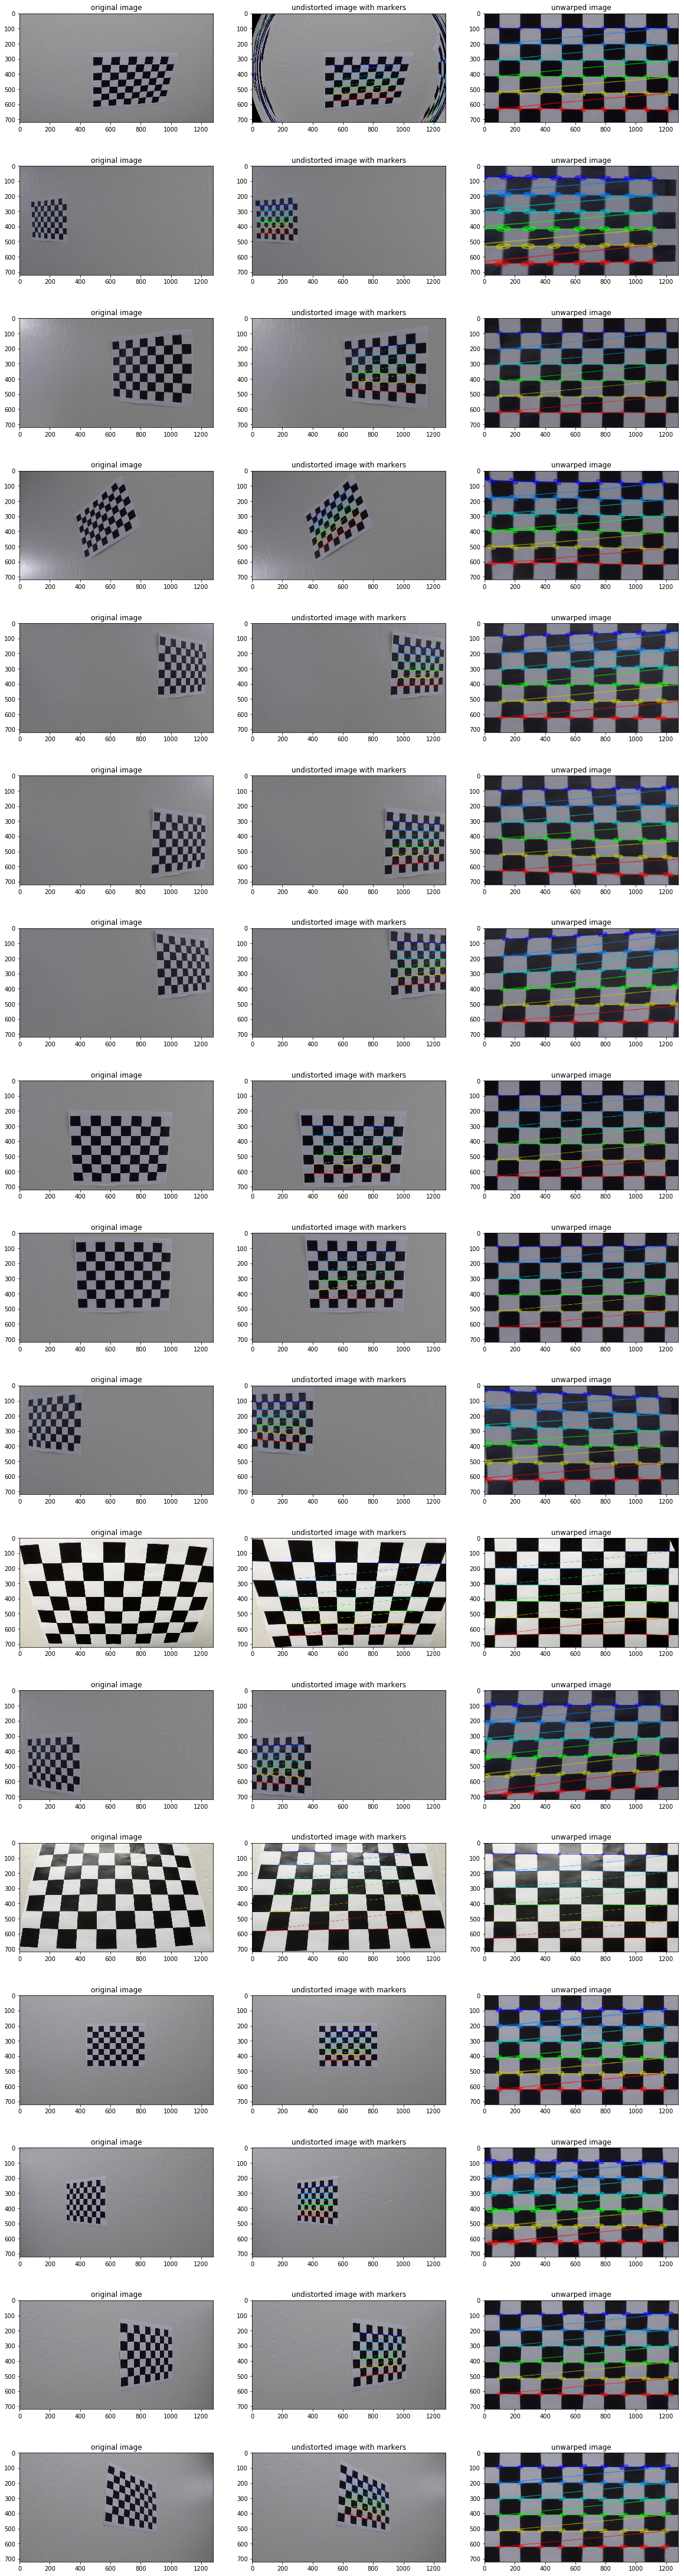

In [8]:

## PERFORM CAMERA CALIBRATION ##

all_images = glob.glob('CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all images
objpoints = []
imgpoints = []

nx = 9
ny = 6
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x,y coordinates

rows = len(all_images)
fig_num =1
fig=plt.figure(figsize=(20, 80))

for index,file_name in enumerate(all_images):
    image = mpimg.imread(file_name)
    
    # --- If we want to plot the chessboards---
    fig.add_subplot(rows, 3,fig_num)
    fig_num+=1
    plt.title('original image')
    plt.imshow(image)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        imgpoints.append(corners)
        objpoints.append(objp)
    
    chessboard_corners = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
    # --- If we want to plot the chessboards with identified corners---  
    #fig.add_subplot(rows, 3, fig_num)
    #fig_num+=1
    #plt.imshow(chessboard_corners)
    
    # --- If we want to plot the perspective chessboards---  
    undistorted,mtx,dist = cal_undistort(chessboard_corners, objpoints, imgpoints)
    fig.add_subplot(rows, 3, fig_num)
    fig_num+=1
    plt.title('undistorted image with markers')
    plt.imshow(undistorted)

    # UNWARP CHESSBOARD IMAGES = make them straight
    unwarped_img,M = corners_unwarp(undistorted,nx,ny,mtx,dist)
    fig.add_subplot(rows, 3, fig_num)
    fig_num+=1
    plt.title('unwarped image')
    plt.imshow(unwarped_img)

    
np.save('camera_imgpoints.np',imgpoints)
np.save('camera_objpoints.np',objpoints)
